In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
death_url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
deaths_df = pd.read_csv(death_url, error_bad_lines=False)

cases_url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
cases_df = pd.read_csv(cases_url, error_bad_lines=False)

states_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-08-2020.csv"
states_df = pd.read_csv(states_url, error_bad_lines=False)

# county_level = "https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv"
county_df = pd.read_csv('./covid19/small_abridged.csv', error_bad_lines=False)

In [82]:
deaths_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,92,94,95,97,97,99,99,102,107,108
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,4,4,4,4,4,4,4,4,4,4


In [95]:
#drop territories
cases = cases_df[~cases_df['Admin2'].isnull()] 
#drop those without FIPS-we thought this is acceptable because most are not actually counties, and there's only 10 of them
cases = cases[~cases['FIPS'].isnull()] 
#change FIPS to integer type
cases['FIPS'] = cases['FIPS'].astype(int)
#Only dealing with states, so county is better name
cases = cases.rename(columns={'Admin2':'County'}) 
#the country is US, unnecessary
cases = cases.drop(columns=['Country_Region'])
cases.head()

#repeat for deaths

#drop territories
deaths = deaths_df[~deaths_df['Admin2'].isnull()] 
#drop those without FIPS-we thought this is acceptable because most are not actually counties, and there's only 10 of them
deaths = deaths[~deaths['FIPS'].isnull()] 
#change FIPS to integer type
deaths['FIPS'] = deaths['FIPS'].astype(int)
#Only dealing with states, so county is better name
deaths = deaths.rename(columns={'Admin2':'County'})
deaths.head()

county = county_df.rename(columns={'countyFIPS':'FIPS', 'CountyName':'County'}).drop(columns=['Unnamed: 0'])
# drop rows that are not counties. There's only two: NYC and Kansas City, so shouldn't matter much
county = county[county['FIPS'].str.isnumeric()]
county['FIPS'] = county['FIPS'].astype(int)
county.head()


,FIPS,STATEFP,COUNTYFP,County,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,Chlamydia Rate,Teen Birth Rate,Preventable Hospitalization Rate,% Vaccinated,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Drive Alone to Work,% Long Commute - Drives Alone
0,1001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,407.2,25.284927,7108.0,41.0,272.282220,68.526994,11.7,0.0,86.523661,39.6
1,1003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,325.0,27.880692,4041.0,44.0,203.660396,72.385054,10.3,0.0,84.282433,41.7
2,1005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,716.3,40.870815,6209.0,37.0,414.277861,70.274612,11.5,0.0,83.368470,32.2
3,1007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,339.7,41.696794,5961.0,38.0,89.349126,108.156028,11.2,0.0,84.910647,49.8
4,1009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,234.4,33.534595,4060.0,39.0,482.690611,107.285369,11.7,0.0,86.178362,59.4


In [103]:
california_counties = county[county['State'] == 'California']

#merge county data with cases
california_cases = cases[cases['Province_State'] == 'California']
california_cases = california_counties.merge(california_cases, right_on='FIPS', left_on='FIPS', how='right', validate='one_to_many')

#merge county data with deaths
california_deaths = deaths[deaths['Province_State'] == 'California']
california_deaths = california_counties.merge(california_deaths, right_on='FIPS', left_on='FIPS', how='right', validate='one_to_many')

california_cases.head()

,FIPS,STATEFP,COUNTYFP,County_x,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,6001,6.0,1.0,Alameda,CA,California,37.646537,-121.849494,37.705201,-122.100393,...,1603,1636,1706,1749,1776,1809,1863,1917,1961,2023
1,6003,6.0,3.0,Alpine,CA,California,38.595405,-119.817665,38.728298,-119.847603,...,2,2,2,2,2,2,2,2,2,2
2,6005,6.0,5.0,Amador,CA,California,38.452565,-120.640865,38.394208,-120.775729,...,8,8,8,8,8,8,8,8,8,8
3,6007,6.0,7.0,Butte,CA,California,39.667234,-121.600771,39.669037,-121.707635,...,16,16,16,16,17,17,18,18,18,18
4,6009,6.0,9.0,Calaveras,CA,California,38.209207,-120.553016,38.163627,-120.633718,...,13,13,13,13,13,13,13,13,13,13


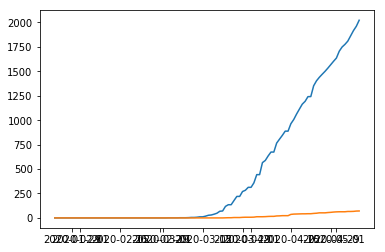

In [105]:
cases.columns.values
dates = cases.columns[11:]
x=pd.to_datetime(dates).values
y=cases[cases['County'] == 'Alameda'][dates].iloc[0].values
sns.lineplot(x=x, y=y)
y=deaths[deaths['County'] == 'Alameda'][dates].iloc[0].values
sns.lineplot(x=x, y=y)